In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/oftve/Downloads/airportvisit.csv')


In [3]:
# Здесь винтажи прописани руками (костыли), зато они в относительных значениях, корректно подписаны и с графиками.
def vintagi (d, t1, t2, t_gr):
    d[t1] = pd.to_datetime(d[t1])
    d[t2] = pd.to_datetime(d[t2])
    d['delta'] = d[t2] - d[t1]
    d['delta'] = df['delta'].dt.components['hours']
    d['flag_0'] = [1 if x >= 0 else 0 for x in d['delta']]
    d['flag_3'] = [1 if x > 3 else 0 for x in d['delta']]
    d['flag_6'] = [1 if x > 6 else 0 for x in d['delta']]
    d['f_1'] = 0
    dd = d.groupby([t_gr]).agg({'flag_0': 'sum', 'f_1' : 'sum', 'flag_3': 'sum', 'flag_6': 'sum'
                            }).reset_index().rename(columns={t_gr:'Аэропорт'
                            ,'flag_0': 'Общее время', 'f_1' : 'До 3 часов', 'flag_3': 'Больше 3 часов', 'flag_6': 'Больше 6 часов'
                            } )
    dd['До 3 часов'] = dd['Общее время'] / dd['Общее время']*100
    dd['Больше 3 часов'] = dd['Больше 3 часов'] / dd['Общее время']*100
    dd['Больше 6 часов'] = dd['Больше 6 часов'] / dd['Общее время']*100
    dd=dd.round(2)
    new = dd.T
    new.columns=new.iloc[0]
    new = new.iloc[2:5,:]
    new.plot()
    plt.xlabel('Время стояния в аэропорту')
    plt.ylabel('Доля водителей в %')
    return new

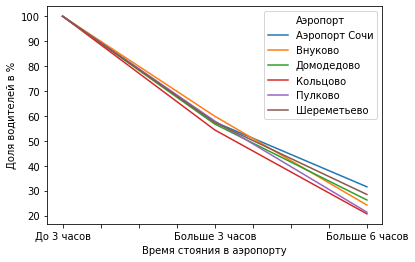

In [4]:
ddd = vintagi (df, 'time_came', 'time_left', 'id_port') 

In [5]:
ddd

Аэропорт,Аэропорт Сочи,Внуково,Домодедово,Кольцово,Пулково,Шереметьево
До 3 часов,100.0,100.0,100.0,100.0,100.0,100.0
Больше 3 часов,57.53,59.87,56.71,54.35,57.93,57.33
Больше 6 часов,31.51,24.2,26.22,20.65,21.33,28.44
